In [1]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Quandl will be used for importing historical oil prices
import quandl

In [2]:
# Setting our API key
quandl.ApiConfig.api_key = ""

# Importing our data
data = quandl.get("FRED/DCOILWTICO", start_date="2000-01-01", end_date="2020-01-01")

In [3]:
data.head()

,Value
Date,
2000-01-04,25.56
2000-01-05,24.65
2000-01-06,24.79
2000-01-07,24.79
2000-01-10,24.71


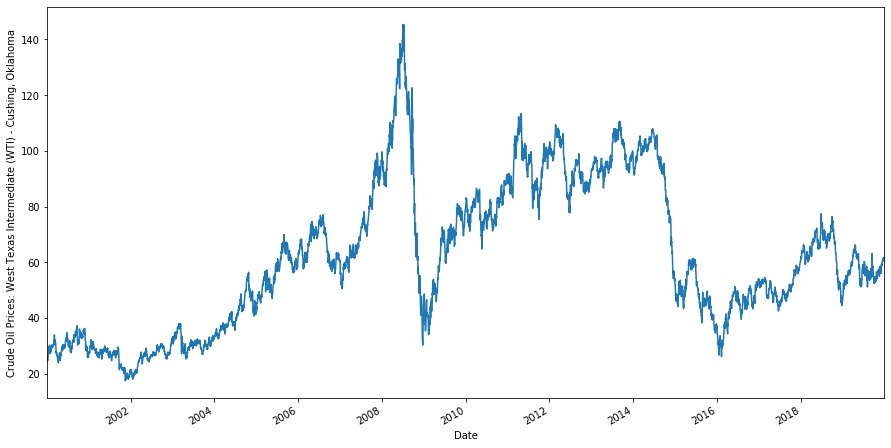

In [4]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma")

# Setting the size of our graph
data.Value.plot(figsize=(15,8))

In [5]:
#moving average of 3 and 9 days

In [6]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()

In [7]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
Date,,
2000-01-18,26.980000,25.681111
2000-01-19,27.873333,26.061111
2000-01-20,28.700000,26.556667
2000-01-21,29.253333,27.098889
2000-01-24,29.496667,27.645556


In [8]:
# Setting-up the dependent variable
y = data['Value']

# Getting the head of the data
y.head()

Date
2000-01-18    28.98
2000-01-19    29.11
2000-01-20    29.67
2000-01-21    29.71
2000-01-24    29.25
Name: Value, dtype: float64

In [9]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [10]:
#Linear Regression model
model = LinearRegression().fit(X_train,y_train)

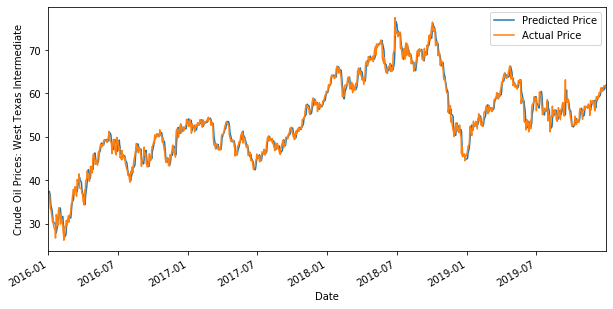

In [11]:
#prediction
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: West Texas Intermediate")
plt.show()

In [12]:
# Computing the accuracy of our model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 98.09% accuracy.


In [13]:
# Let’s change the start date to “1990–01–01” and see how it affects our model’s accuracy!

In [14]:
# Importing our data
newdata = quandl.get("FRED/DCOILWTICO", start_date="1990-01-01", end_date="2020-12-12")

In [15]:
newdata['MA3'] = newdata['Value'].shift(1).rolling(window=3).mean()
newdata['MA9']= newdata['Value'].shift(1).rolling(window=9).mean()

In [23]:
newdata['MA1'] = newdata['Value'].shift(1).rolling(window=1).mean()
newdata['MA2']= newdata['Value'].shift(1).rolling(window=2).mean()

In [24]:
# Dropping the NaN values
newdata = newdata.dropna()

# Initialising X and assigning the two feature variables
X = newdata[['MA1','MA2']]

# Getting the head of the data
X.head()

,MA1,MA2
Date,,
1990-01-17,22.61,22.485
1990-01-18,22.11,22.360
1990-01-19,22.78,22.445
1990-01-22,23.70,23.240
1990-01-23,22.57,23.135


In [25]:
# Setting-up the dependent variable
y = newdata['Value']

# Getting the head of the data
y.head()

Date
1990-01-17    22.11
1990-01-18    22.78
1990-01-19    23.70
1990-01-22    22.57
1990-01-23    22.34
Name: Value, dtype: float64

In [26]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [27]:
#Linear Regression model
linear = LinearRegression().fit(X_train,y_train)

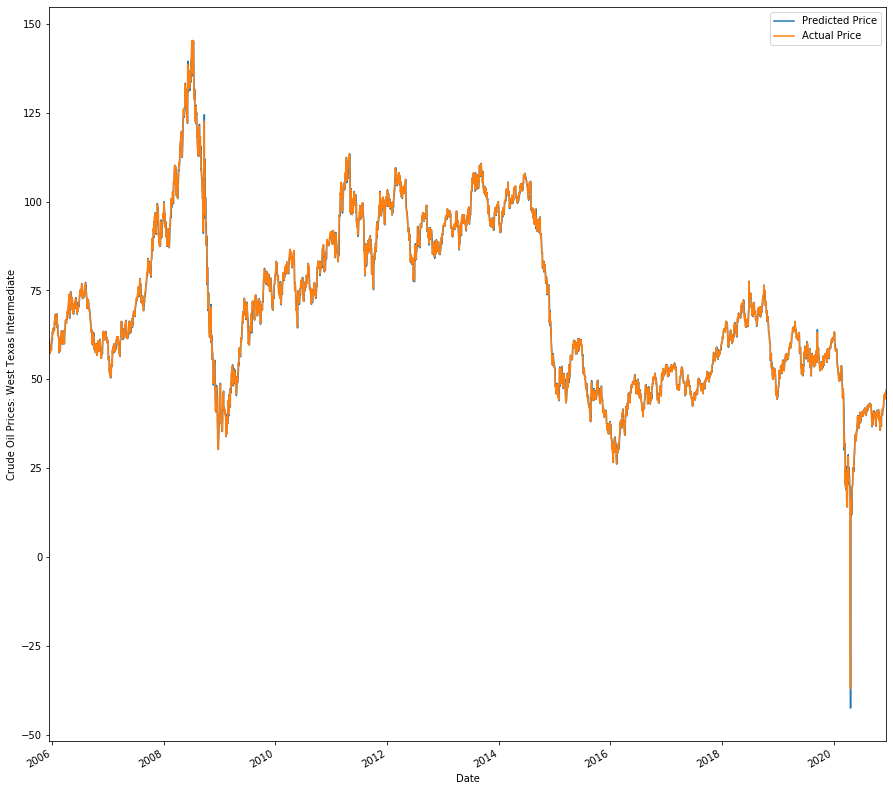

In [28]:
#prediction
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(15,15))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: West Texas Intermediate")
plt.show()

In [22]:
# Computing the accuracy of our model
R_squared_score = linear.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.12% accuracy.


In [29]:
# Computing the accuracy of our model
R_squared_score = linear.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.27% accuracy.
